In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    """生成 y = Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
print(type(features),type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [4]:
print('features',features[0],'\nlabel:',labels[0])

features tensor([0.4786, 1.7418]) 
label: tensor([-0.7789])


torch.Size([1000, 2])


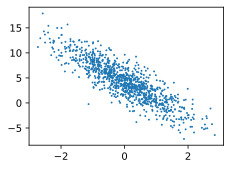

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)
print(features.shape)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.7390, -0.2928],
        [ 0.3266, -1.3895],
        [ 1.2870, -1.5983],
        [ 0.7155,  1.4859],
        [-2.2426, -0.9734],
        [ 0.2335, -0.6254],
        [ 1.2120, -0.9771],
        [ 0.6852,  0.6069],
        [ 0.0436, -0.4623],
        [-0.2488, -0.3755]]) 
 tensor([[ 1.7231],
        [ 9.5766],
        [12.2060],
        [ 0.5760],
        [ 3.0201],
        [ 6.8011],
        [ 9.9650],
        [ 3.5023],
        [ 5.8723],
        [ 4.9865]])
